# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


# Task 1 
## State the number of missing values in the column
### Observation
- web_browser has 150 missing values
- reviewer_age has 105 missing values
## State whether the values match the description given in the table above.
- owned: The values match the description given in the table above
- make_model: The values match the description given in the table above
- review_month: The values didn't match the description given in the table above
- web_browser: The values didn't match the description given in the table above
- reviewer_age: The values didn't match the description given in the table above
- primary_use: The values match the description given in the table above
- value_for_money: The values didn't match the description given in the table above
- overall_rating: he values match the description given in the table above
## Describe what you did to make values match the description if they did not match.
- Review_month
1. i removed the numbers in review_month column
2. i removed the (-) character in review_month column
3. i converted the data type to int
- web_browse
1. i filled the null values with 'Unknown'
- Reviewer Age
1. i removed the (-) character in review_month column
2. i filled the null values with the mean
3. i converted the data type to int
- value_for_money
1. i splitted the values and used only the first value in value_for_money column
2. i converted the data type on int

In [15]:
# Import all necessary libraries
import seaborn as sns
#sns.set()
sns.set(style="whitegrid")

import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd

# importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# read and load file
df = pd.read_csv('electric_bike_ratings_2212.csv')
# head of the file
df.head()
#replacing the numbers in review_month column
df['review_month'] = df['review_month'].str.replace('\d+', '')
#removing the (-) character in review_month column
df['review_month'] = df['review_month'].str.replace("-", "")
# Splitting of the values and using of the first value in value_for_money column
df['value_for_money'] = df['value_for_money'].apply(lambda x: x.split('/')[0]).astype(int)
# head of the file
df.head()
# information of the data
df.info()
#removing the (-) character in reviewer_age column
df['reviewer_age'] = df['reviewer_age'].str.replace("-", "")
# converting 'reviewer_age' data type from object to float
df['reviewer_age'] = pd.to_numeric(df['reviewer_age'])
#converted the review month to datetime
df['review_month']= pd.to_datetime(df['review_month'], format='%b').dt.month
# information of the data
df.info()
# checking null values
df.isnull().sum()
# replacing na values in web_browser with unknown
df["web_browser"].fillna("unknown", inplace = True)
# replacing na values in web_browser with unknown
df["reviewer_age"].fillna((df["reviewer_age"].mean()), inplace = True)
# checking null values
df.isnull().sum()
# converting 'reviewer_age' data type from float to int
df['reviewer_age'] = df['reviewer_age'].astype(int)
# information of the data
df.info()
# descriptive statistical analysis
df.describe()
# checking Duplicates 
df.duplicated().sum()
# head of the file
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1350 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   int64  
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 93.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   int64  
 3   web_browser      1350 non-null

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,10,Chrome,23,Commuting,5,18.62
1,0,Nielah-Keetra,6,unknown,24,Commuting,4,15.55
2,0,Lunna-Keetra,10,Chrome,28,Commuting,5,12.76
3,1,Hoang-Keetra,11,IE,41,Leisure,5,17.07
4,1,Lunna-Keetra,9,Chrome,33,Leisure,5,12.29


## Task 2
### Univariate Analysis

basically, looking at one feature and its visualization
### Observation 
it is observed that 890 people owned moped and 610 people Don’t own any moped. According to the graphs Count of Owned, category 1 which denotes someone who "owns the moped" has the most observations, totaling 890. 610 observations were made by non-moped owners. The following picture makes it seem as though the observations are not evenly distributed among the categories of the variable, meaning not balanced.

In [16]:
# count of owned category
own = df['owned'].value_counts().sort_values()
own

0    610
1    890
Name: owned, dtype: int64

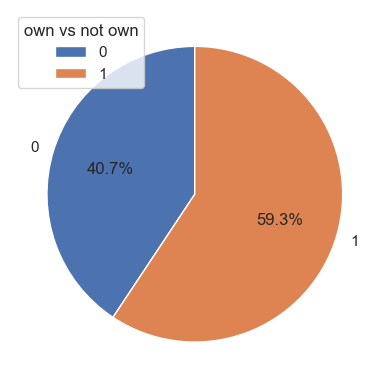

In [17]:
# plot pie chart
plt.pie(own, labels = own.index, autopct = '%1.1f%%', startangle = 90)
plt.legend(labels = own.index,title= 'own vs not own', loc = 'upper left')
plt.show()

<AxesSubplot: xlabel='owned', ylabel='count'>

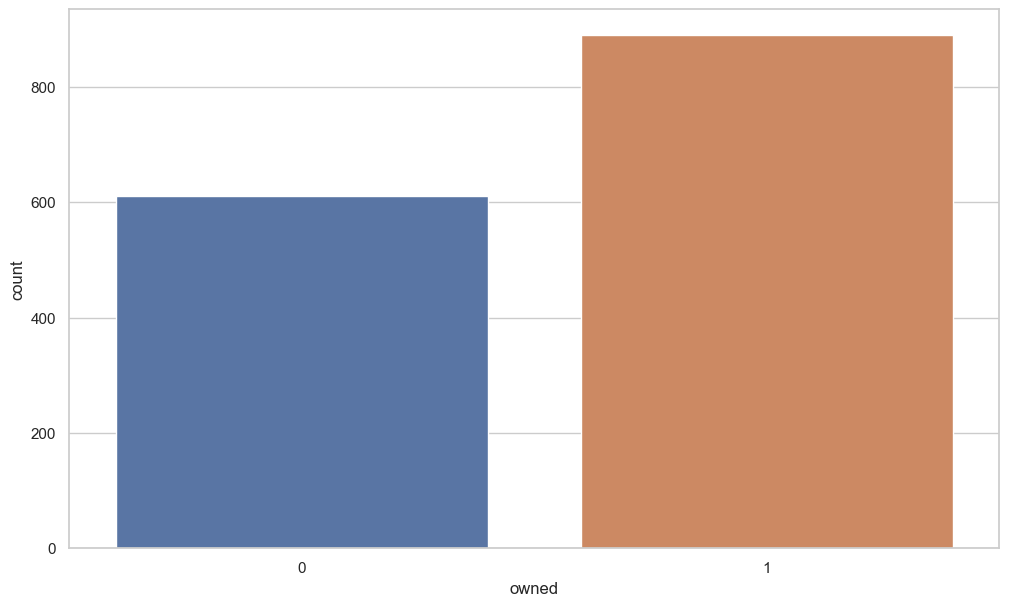

In [18]:
# plot bar chart
fig,ax =plt.subplots(figsize=(12,7))
sns.countplot(data=df, x='owned')

## Task 3
## Observation
from the graph above using histogram to show the distribution and count of different overall ratings, it shows the distribution of the overall rating across the possible values. it is observed that we have more of 18.62, 18.63,18.77, 18.88 and 18.51.

[Text(0.5, 1.0, 'The Distribution of the Overall Rating Values'),
 Text(0.5, 0, 'Overall Rating'),
 Text(0, 0.5, 'Count of Ratings')]

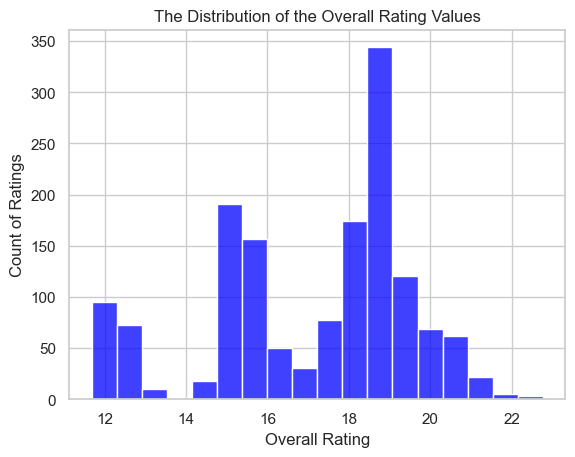

In [19]:
#Using a histplot to show the distribution 
sns.histplot(x=df['overall_rating'],color='blue',common_norm = True).set(title='The Distribution of the Overall Rating Values',
                                                                         xlabel='Overall Rating', ylabel='Count of Ratings')

In [20]:
df.overall_rating.value_counts().head(10)

18.62    10
18.63    10
18.77    10
18.88    10
18.51    10
18.58     9
18.46     9
18.53     9
18.70     9
18.64     9
Name: overall_rating, dtype: int64

## Task 4
### Bivariate Analysis

basically, comparing two features and its visualization
### Observation
With the owned variable on the x axis and the overall rating on the y axis, the graph displays a boxplot. The boxplot provides information about symmetry, skew, variance, and other crucial parameters. The visualization does an excellent job of aiding in the interpretation of the relationship because there are no extreme outliers. We can infer that when a review comes from an owner, the overall rating's minimum and maximum values take place. The interquartile range is wide for non-owners but is highest for those in the "owned" category.

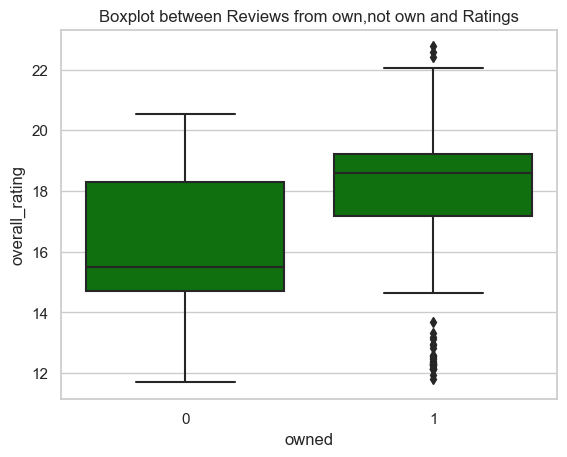

In [21]:
#Creating a standard boxplot to demonstrate the relationship between the overall rating and the own and not own.
sns.boxplot(data=df, y='overall_rating',x='owned',color='GREEN').set(title='Boxplot between Reviews from own,not own and Ratings');

## Task 5
This is Classification Machine Learning Problem. Predicting the category or class label of an input based on its attributes is the objective of the common machine learning issue known as classification. When classifying data, the input is often a set of characteristics or traits, and the result is a discrete class label or a probability distribution over the potential classes.

In [22]:
# Import all necessary libraries
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report,accuracy_score
from sklearn. model_selection import GridSearchCV, KFold

### One-Hot Encoding

With one-hot encoding, we can convert categorical feature into numerical. Each value of a column is pivoted into a column of its own. The values in this new column will be either 1 or 0 to show whether that value exist or not.

In [23]:
#1.select the categorical variables and replace pass with your code
categorical = ['make_model', 'web_browser', 'primary_use']
#2. we use pd.get_dummies() for one-hot encoding and replace pass with your code

categories_dummies = pd.get_dummies(df[categorical])

# view what you have done
categories_dummies.head()
#3. join the encoded variables back to the main dataframe using pd.concat(), we will now pass both train and categories_dummies
# as a list of their names and pop out a documentation for pd.concat() to clarify

df = pd.concat([df, categories_dummies], axis = 1).copy()

# check what you have done
print(df.shape)
df.head()


(1500, 23)


,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating,make_model_Hoang-Eyden,make_model_Hoang-Keetra,make_model_Lunna-Eyden,make_model_Lunna-Keetra,make_model_Nielah-Eyden,make_model_Nielah-Keetra,web_browser_Android,web_browser_Chrome,web_browser_Firefox,web_browser_IE,web_browser_Opera,web_browser_Safari,web_browser_unknown,primary_use_Commuting,primary_use_Leisure
0,1,Nielah-Eyden,10,Chrome,23,Commuting,5,18.62,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1,0,Nielah-Keetra,6,unknown,24,Commuting,4,15.55,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
2,0,Lunna-Keetra,10,Chrome,28,Commuting,5,12.76,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3,1,Hoang-Keetra,11,IE,41,Leisure,5,17.07,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,1,Lunna-Keetra,9,Chrome,33,Leisure,5,12.29,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1


In [24]:
#4. remove the initial categorical columns now that we have encoded them. Use the list called categorical to delete all the
# initially selected columns at once, replace pass in the code below

df = df.drop(categorical, axis = 1).copy()
df.head()

,owned,review_month,reviewer_age,value_for_money,overall_rating,make_model_Hoang-Eyden,make_model_Hoang-Keetra,make_model_Lunna-Eyden,make_model_Lunna-Keetra,make_model_Nielah-Eyden,make_model_Nielah-Keetra,web_browser_Android,web_browser_Chrome,web_browser_Firefox,web_browser_IE,web_browser_Opera,web_browser_Safari,web_browser_unknown,primary_use_Commuting,primary_use_Leisure
0,1,10,23,5,18.62,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1,0,6,24,4,15.55,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
2,0,10,28,5,12.76,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3,1,11,41,5,17.07,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,1,9,33,5,12.29,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1


In [25]:
print(df.shape)

(1500, 20)


In [26]:
# choose a target 
y = df.owned
# choose the features
X = df.drop('owned', axis = 1)
X.head()

,review_month,reviewer_age,value_for_money,overall_rating,make_model_Hoang-Eyden,make_model_Hoang-Keetra,make_model_Lunna-Eyden,make_model_Lunna-Keetra,make_model_Nielah-Eyden,make_model_Nielah-Keetra,web_browser_Android,web_browser_Chrome,web_browser_Firefox,web_browser_IE,web_browser_Opera,web_browser_Safari,web_browser_unknown,primary_use_Commuting,primary_use_Leisure
0,10,23,5,18.62,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1,6,24,4,15.55,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
2,10,28,5,12.76,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3,11,41,5,17.07,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,9,33,5,12.29,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1


In [27]:
# Create a train and test dataset

from sklearn.model_selection import train_test_split

# split the dataset with test size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30, stratify = y)
#Scale the dependent variable
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

## Task 6
### Baseline Model - logistic regression 

In [28]:
# get the appropriate hyperparameter fro logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression ()
parameter = {'C': [0.001,0.01,0.1,1.0,10.0]}
kf= KFold(n_splits=5, shuffle=True, random_state=30)
grid_cv = GridSearchCV(lr, parameter, cv=kf)
grid_cv.fit(X_train,y_train)
print('The Best Parameter: {}'.format(grid_cv.best_params_))
print('The Best Score: {}'.format(grid_cv.best_score_))

The Best Parameter: {'C': 10.0}
The Best Score: 0.7552380952380953


In [29]:
lr_model = LogisticRegression(C=10.0)

# fit the model
lr_model.fit(X_train, y_train)

# create the prediction
lr_preds = lr_model.predict(X_test)
y_pred_lr_prob = lr_model.predict_proba(X_test)[:,1]
accuracy_lr = lr_model.score(X_test, y_test)

# import accuracy score
from sklearn.metrics import accuracy_score
print('Logistic Regression Accuracy : \n{:.3f}'.format(accuracy_lr))

Logistic Regression Accuracy : 
0.769


## Task 7
### Observation
The accuracy score of the comparison model, the Random Forest Classifier, is lower than that of the Logistic Regression model.

In [31]:
# Try to get the best hyperparameter for random forest classifier
# import the random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier ()
parameter ={'max_depth':[3,4,5],'min_samples_leaf':[0.1,0.2,0.3],'n_estimators':[300, 400, 450]}
grid_rf = GridSearchCV(rf, param_grid =parameter, cv=3, n_jobs=-1)
grid_rf.fit(X_train,y_train)
print('Best score: {}'.format (grid_rf.best_score_))
print ('Best params: {}'.format (grid_rf.best_params_))
print ('Best model: {}'. format(grid_rf.best_estimator_))
rf_model = grid_rf.best_estimator_

Best score: 0.7285714285714285
Best params: {'max_depth': 5, 'min_samples_leaf': 0.1, 'n_estimators': 450}
Best model: RandomForestClassifier(max_depth=5, min_samples_leaf=0.1, n_estimators=450)


In [32]:
# fit the model
rf_model.fit(X_train, y_train)

# create the prediction
rf_preds = rf_model.predict(X_test)
y_pred_rf_prob = rf_model.predict_proba(X_test)[:,1]
accuracy_rf = rf_model.score(X_test, y_test)

# print accuracy score
print('Random Forest Classifier Accuracy : \n{:.3f}'.format(accuracy_rf))

Random Forest Classifier Accuracy : 
0.736


## Task 8
I've decided to utilize logistic regression because it's a popular statistical learning approach for situations involving binary categorization. Despite its name, logistic regression, which I used to train my base model, is essentially a classification technique rather than a regression approach. I chose the RandomForestClassifier as a comparison model because it is a similarly easy-to-build and train classification model. For many classification tasks, it produces reliable and accurate results by combining numerous decision trees to make predictions.

## Task 9
Evaluating and interpreting the target variable by combining the accuracy score, AUC score, classification report, and plotting the confusion matrix. By displaying the expected and actual numbers on different axes, this enables us to evaluate how the predicted and true labels line up. Observing the erroneous positives and false negatives that emerge after running this technique, in my opinion, is also powerful.

In [33]:
# print accuracy score
print('Logistic Regression Accuracy : \n{:.3f}'.format(accuracy_lr))
print('-'*50)
print('Confusion Matrix : \n{}'.format(confusion_matrix(y_test,lr_preds)))
print('-'*50)
print('Classification Report : \n{}'.format(classification_report(y_test,lr_preds)))
print('-'*50)
print('AUC Score : \n{:.3f}'.format(roc_auc_score(y_test, lr_preds)))

Logistic Regression Accuracy : 
0.769
--------------------------------------------------
Confusion Matrix : 
[[107  76]
 [ 28 239]]
--------------------------------------------------
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.58      0.67       183
           1       0.76      0.90      0.82       267

    accuracy                           0.77       450
   macro avg       0.78      0.74      0.75       450
weighted avg       0.77      0.77      0.76       450

--------------------------------------------------
AUC Score : 
0.740


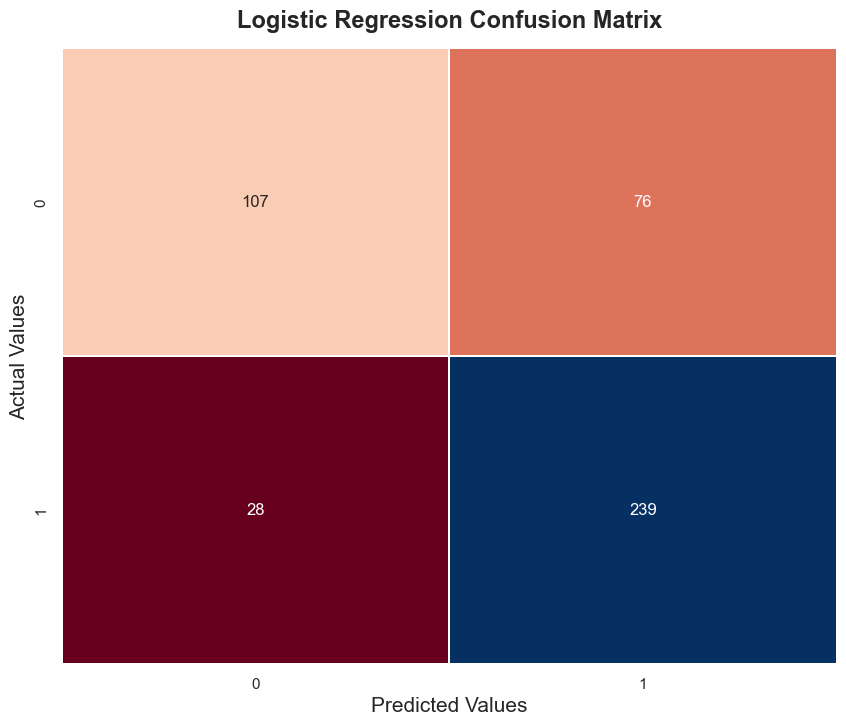

In [34]:
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,lr_preds), cbar=False, cmap='RdBu',annot=True,fmt='.0f',linewidth=0.1)
plt.xlabel('Predicted Values',fontsize=15)
plt.ylabel('Actual Values',fontsize=15)
plt.title('Logistic Regression Confusion Matrix',fontsize=17,y=1.02,weight='bold')
plt.show()

In [35]:
false_positive_rate,true_positive_rate,threshold = roc_curve(y_test,y_pred_lr_prob)
auc_score = roc_auc_score(y_test,y_pred_lr_prob)
print(f'The Area Under ROC Curv Score is {auc_score*100}%')

The Area Under ROC Curv Score is 84.46204539407707%


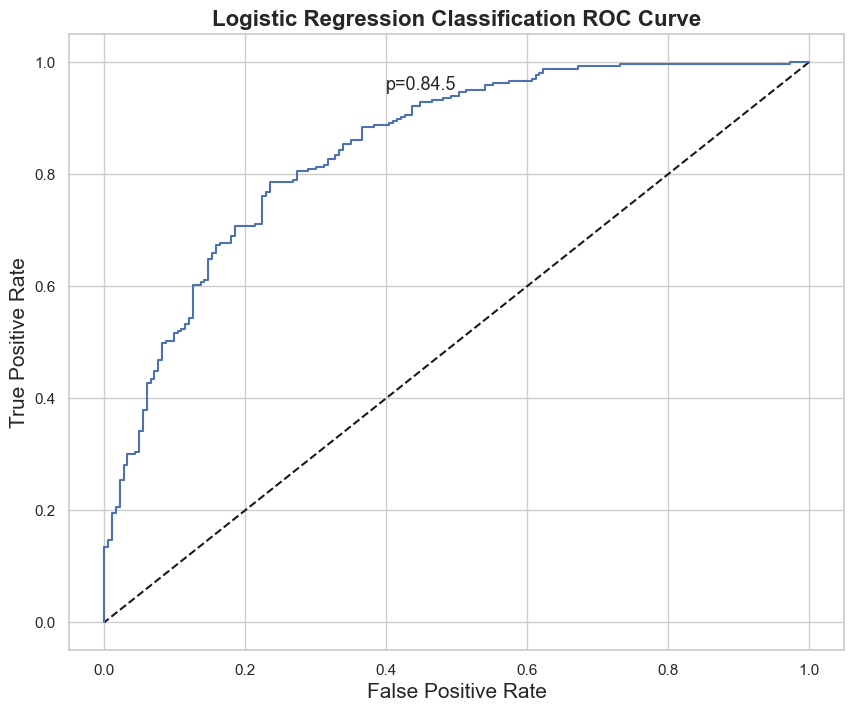

In [36]:
fig= plt.figure(figsize=(10,8))
plt.plot([1,0],[1,0],'k--')
plt.plot(false_positive_rate,true_positive_rate)
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('Logistic Regression Classification ROC Curve',fontsize=16, weight ='bold')
plt.annotate('p=0.84.5',xy=(0.4,0.95),fontsize=13)
plt.show()

In [37]:
print('Random Forest Classifier Accuracy : \n{:.3f}'.format(accuracy_rf))
print('-'*50)
print('Confusion Matrix : \n{}'.format(confusion_matrix(y_test,rf_preds)))
print('-'*50)
print('Classification Report : \n{}'.format(classification_report(y_test,rf_preds)))
print('-'*50)
print('AUC Score : \n{:.3f}'.format(roc_auc_score(y_test, rf_preds)))

Random Forest Classifier Accuracy : 
0.736
--------------------------------------------------
Confusion Matrix : 
[[101  82]
 [ 37 230]]
--------------------------------------------------
Classification Report : 
              precision    recall  f1-score   support

           0       0.73      0.55      0.63       183
           1       0.74      0.86      0.79       267

    accuracy                           0.74       450
   macro avg       0.73      0.71      0.71       450
weighted avg       0.74      0.74      0.73       450

--------------------------------------------------
AUC Score : 
0.707


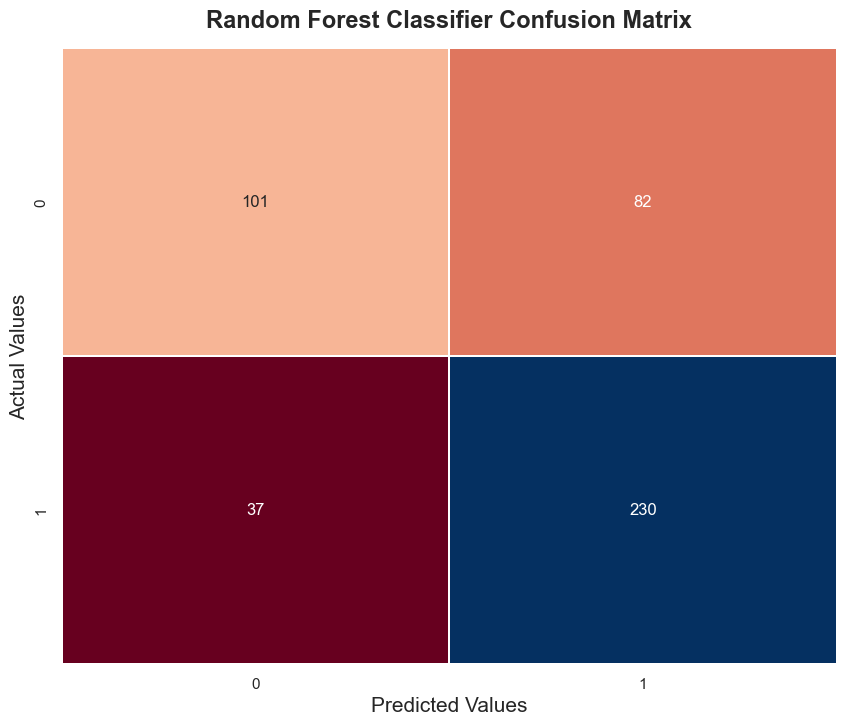

In [38]:
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,rf_preds), cbar=False, cmap='RdBu',annot=True,fmt='.0f',linewidth=0.1)
plt.xlabel('Predicted Values',fontsize=15)
plt.ylabel('Actual Values',fontsize=15)
plt.title('Random Forest Classifier Confusion Matrix',fontsize=17,y=1.02,weight='bold')
plt.show()

In [39]:
false_positive_rate,true_positive_rate,threshold = roc_curve(y_test,y_pred_rf_prob)
auc_score = roc_auc_score(y_test,y_pred_rf_prob)
print(f'The Area Under ROC Curv Score is {auc_score*100}%')

The Area Under ROC Curv Score is 79.94003397392603%


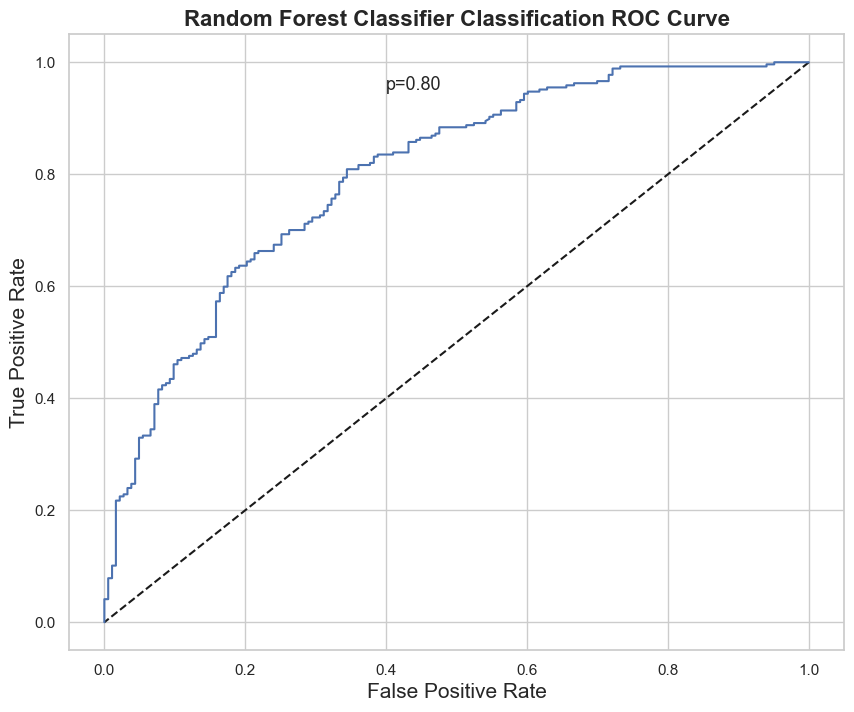

In [40]:
fig= plt.figure(figsize=(10,8))
plt.plot([1,0],[1,0],'k--')
plt.plot(false_positive_rate,true_positive_rate)
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('Random Forest Classifier Classification ROC Curve',fontsize=16, weight ='bold')
plt.annotate('p=0.80',xy=(0.4,0.95),fontsize=13)
plt.show()

## Task 10
A higher total accuracy score, improved precision and recall, and an F1 score were obtained for the logistic regression, which performed better. Furthermore, the logistic regression model yielded fewer false positives and false negatives than the random forest classifier model, as seen graphically.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam